In [5]:
%pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu<YOUR_CUDA_VERSION>/torch_stable.html


  Using cached matplotlib-3.5.3-cp37-cp37m-win_amd64.whl (7.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached kiwisolver-1.4.5-cp37-cp37m-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
Using cached kiwisolver-1.4.5-cp37-cp37m-win_amd64.whl (55 kB)
Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
Note: you may need to restart the kernel to use updated packages.


In [43]:
%pip nvcc --version

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "nvcc"



100%|██████████| 64467/64467 [00:00<00:00, 293505.08it/s]


Колво картинок: 64467
Колво юник меток: 323
Идентификаторы: {'cars\\Honda Ridgeline': 0, 'cars\\Kia Soul EV': 1, 'cars\\Volkswagen Jetta': 2, 'cars\\Nissan 370Z': 3, 'cars\\Lincoln MKT': 4, 'cars\\Audi A6': 5, 'cars\\McLaren 570S': 6, 'cars\\Lexus NX': 7, 'cars\\Alfa Romeo Stelvio': 8, 'cars\\Alfa Romeo 4C': 9, 'cars\\Kia Forte': 10, 'cars\\Jaguar XF': 11, 'cars\\Toyota Land Cruiser': 12, 'cars\\Hyundai Kona': 13, 'cars\\Mercedes-Benz CLS Class': 14, 'cars\\GMC Sierra 2500HD': 15, 'cars\\Mercedes-Benz GLB Class': 16, 'cars\\Subaru Forester': 17, 'cars\\Nissan Sentra': 18, 'cars\\Land Rover Range Rover Evoque': 19, 'cars\\FIAT 500X': 20, 'cars\\Subaru Ascent': 21, 'cars\\Lexus LX': 22, 'cars\\MINI Clubman': 23, 'cars\\Bentley Mulsanne': 24, 'cars\\BMW 4-Series': 25, 'cars\\Cadillac CT4': 26, 'cars\\Chevrolet Colorado': 27, 'cars\\Jaguar I-Pace': 28, 'cars\\Kia Stinger': 29, 'cars\\Mitsubishi Eclipse Cross': 30, 'cars\\Aston Martin DBS': 31, 'cars\\Volkswagen Passat': 32, 'cars\\Lamborgh

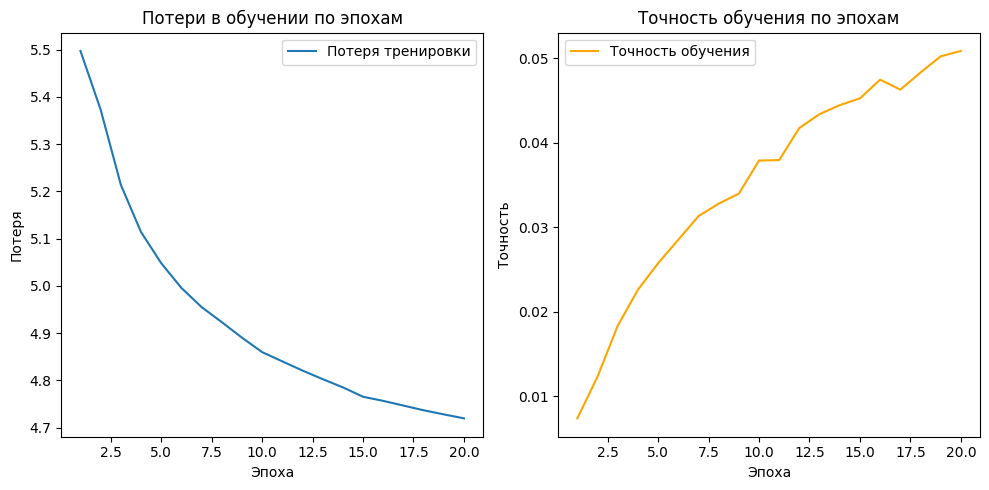

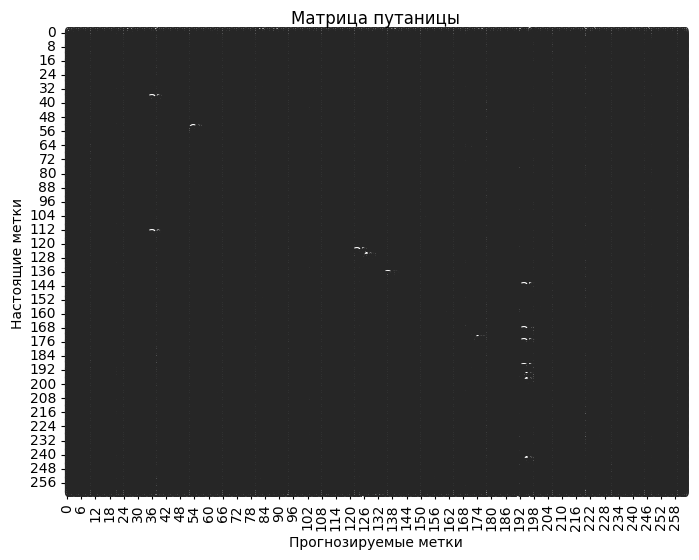

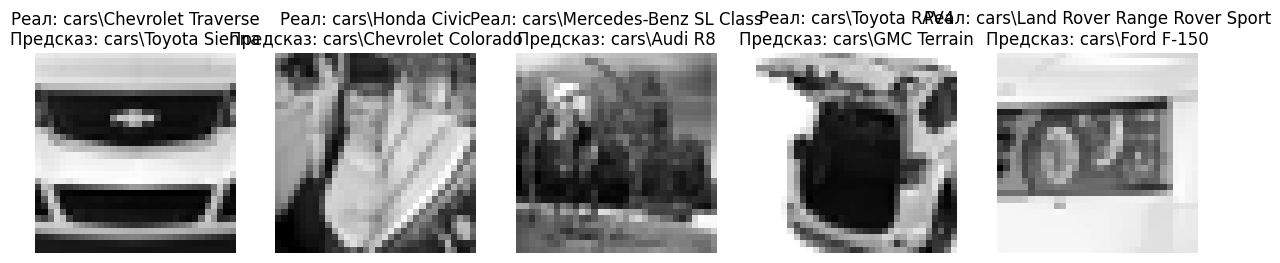

In [2]:

#GAAAAAAAAAAAAAAAAAAAV
#самый сок
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
from collections import Counter
from tqdm import tqdm
from pathlib import Path
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np

class AutoDs(Dataset):
    def __init__(self, data, transform=None, resize=None):
        self.data = data
        self.transform = transform
        self.resize = resize

    def __getitem__(self, index):
        img = Image.open(self.data['img'][index]).convert('L')

        if self.resize is not None:
            img = img.resize(self.resize)
            
        if self.transform:
            img = self.transform(img)
      
        marker= self.data['Метка'][index]
        label = markertoid[marker]
        return img, label
    
    def __len__(self):
        return len(self.data['img'])

# Загрузка изображений
imgs = {}
filekiname = []
markers = []
for file in tqdm(sorted((Path('cars').glob('*.*')))):
    filekiname.append(str(file))
    marker = ' '.join(str(file).split('/')[-1].split('_')[:2])
    markers.append(marker)
print(f"Колво картинок: {len(filekiname)}")
print(f"Колво юник меток: {len(set(markers))}")
data = {"img": filekiname, "Метка": markers}
datasetik = AutoDs(data, transform=ToTensor(), resize=(32, 32))
unique_markers = list(set(markers))
markertoid = {marker: i for i, marker in enumerate(unique_markers)}
idtomarker = {i: marker for i, marker in enumerate(unique_markers)}

print(f"Идентификаторы: {markertoid}\nЗначения: {idtomarker}")
print(len(markertoid))
print(len(idtomarker))
min_proc = 0.001  

min_elems = int(len(datasetik) * min_proc)
suit_markers = [item[0] for item in list(Counter(markers).most_common()) if item[1] >= min_elems]



filt_index =[]            
for i in range(len(datasetik)):
    print(f"Индексочек: {i}, Меточка: {datasetik[i][1]}")
    if idtomarker[datasetik[i][1]] in suit_markers:
        filt_index.append(i)

print(f"{filt_index}")
dataset_filt = torch.utils.data.Subset(datasetik, filt_index)

print(f" {len(dataset_filt)}")
print(f"кьоличество подходящих меток {len(suit_markers)}")
print(f"кьоличество подходящих меток {suit_markers}")

train_data, test_data = train_test_split(dataset_filt, test_size=0.2, shuffle=True, stratify=[elem[1] for elem in dataset_filt])

number_of_samples_train = len(train_data)
number_of_samples_test = len(test_data)

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)
train_batch_count = len(train_loader)
print("Количество батчей в тренировочном наборе:", train_batch_count)
test_batch_count = len(test_loader)
print("Количество батчей в тестовом наборе:", test_batch_count)
print("Длина тестовых данных:", number_of_samples_test)
print("Длина тренировочных данных:", number_of_samples_train)
# Определение класса LeNet-5
class LeNet5(nn.Module):
    def __init__(self, classes, dropout_rate=0.5):
        super(LeNet5, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate),  # Dropout слой
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate),  # Dropout слой
            nn.Linear(84, classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  
        x = self.classifier(x)
        return x

classes = max([elem[1] for elem in train_data]) + 1
model = LeNet5(classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
train_loss_list = []
train_accuracy_list = []
for epoch in range(num_epochs):
    model.train()  # Установка модели в режим обучения

    train_loss = 0.0
    train_correct = 0

    # Проход по каждому батчу в тренировочном наборе
    for images, labels in train_loader:
        optimizer.zero_grad()  # Сброс градиентов

        # Прямой проход (forward pass)
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Обратный проход  и оптимизация
        loss.backward()
        optimizer.step()

        # Вычисление общей потери и точности
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        train_correct += (predicted == labels).sum().item()

    # Вычисление средней потери и точности на тренировочных данных
    train_loss /= number_of_samples_train
    train_accuracy = train_correct / number_of_samples_train
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_accuracy)

    # Вывод результатов после каждой эпохи
    print(f'Эпоха [{epoch+1}/{num_epochs}], '
          f'Потеря: {train_loss:.4f}, '
          f'Точность: {train_accuracy:.4f}')

# Отключение вычисления градиентов для экономии памяти и времени

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Преобразование выходов модели в предсказания
predicted_labels = []
true_labels = []

model.eval()


with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
        

# Рассчитывание метрик
accuracy = accuracy_score(true_labels, predicted_labels)
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels, zero_division=1)


# Вывод результатов оценки
print(f'Точность: {accuracy:.4f}')
print(f'Матрица ошибок:\n{conf_matrix}')
print(f'Отчет о классификации:\n{class_report}')

import matplotlib.pyplot as plt
import seaborn as sns

# Plot потери обучения
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_loss_list, label='Потеря тренировки')
plt.title('Потери в обучении по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Потеря')
plt.legend()

# Plot точности тренировки
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracy_list, label='Точность обучения', color='orange')
plt.title('Точность обучения по эпохам')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

plt.tight_layout()
plt.show()

# Матрица путаницы
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Матрица путаницы')
plt.xlabel('Прогнозируемые метки')
plt.ylabel('Настоящие метки')
plt.show()

# Примеры прогнозов

num_samples_to_visualize = 5
sample_loader = DataLoader(test_data, batch_size=num_samples_to_visualize, shuffle=True)
sample_images, sample_labels = next(iter(sample_loader))
sample_outputs = model(sample_images)
_, sample_predictions = torch.max(sample_outputs, 1)

# Визуализация образцов изображений
sample_images = sample_images.numpy().transpose((0, 2, 3, 1))
sample_images = sample_images.squeeze()  # удалить пакетик 
sample_images = (sample_images * 255).astype(np.uint8)


plt.figure(figsize=(15, 3))
for i in range(num_samples_to_visualize):
    plt.subplot(1, num_samples_to_visualize, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f'Реал: {idtomarker[sample_labels[i].item()]}\nПредсказ: {idtomarker[sample_predictions[i].item()]}')
    plt.axis('off')

plt.show()




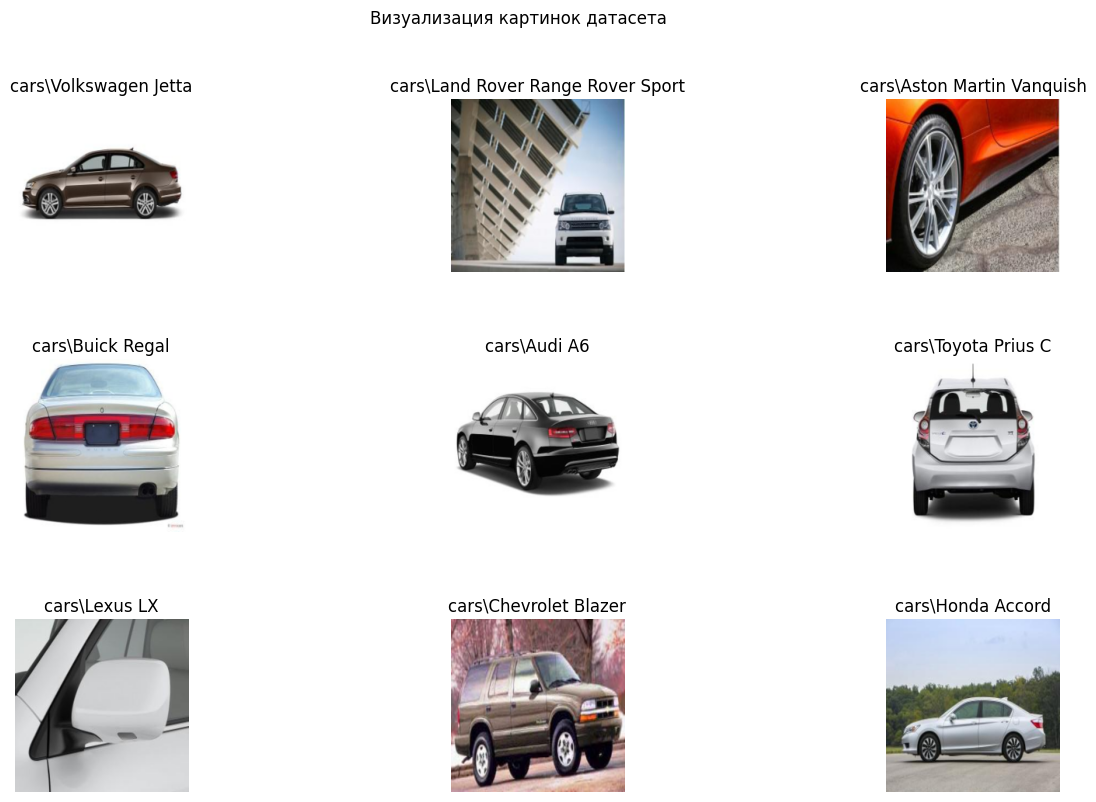

In [ ]:
# Создание обратного словаря id_to_car
id_to_car = {i: car for car, i in car_id.items()}

def show_images(images, labels, title, id_to_car):
    num_rows = 3
    num_columns = 3
    
    plt.figure(figsize=(15, 9))
    plt.suptitle(title)
    
    for i in range(min(len(images), num_rows * num_columns)):
        plt.subplot(num_rows, num_columns, i + 1)
        img = images[i].permute(2, 0, 1).numpy()
        plt.imshow(img)
        label_name = id_to_car[labels[i].item()]
        plt.title(f"{label_name}")
        plt.axis('off')
    
    # Увеличение промежутка между подграфиками
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
    plt.show()

# Получение примеров из DataLoader
sample_batch = next(iter(train_loader))
sample_images, sample_labels = sample_batch

# Отображение картинок
show_images(sample_images, sample_labels, title='Визуализация картинок датасета', id_to_car=id_to_car)
